In [1]:
import sys
import socket
import os

if socket.gethostname() == "qiaubuntu" or socket.gethostname() == "toologic-ubuntu2":
    sys.path.extend(['/home/jorg/repository/seg_uncertainty'])
else:
    sys.path.extend(['/home/jorg/repo/seg_uncertainty'])

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import cm
import numpy as np
import torch

from utils.common import loadExperimentSettings
from eval_umaps.generate_data import SelectiveClassification
# from plotting.coverage_risk_curves import plot_coverage_risk_curve

%matplotlib inline
%load_ext autoreload
%autoreload 2
print("Ready")

Ready


# Generate data for selective classification (coverage-risk curves) for Bayes and Entropy maps

In [23]:

patients = None # ['patient038', 'patient057']

exper_dirs = ["~/expers/acdc/f0/dcnn_mc_brier", "~/expers/acdc/f0/drn_mc_ce", "~/expers/acdc/f0/unet_mc_ce"]
exper_dirs = ["~/expers/acdc/f0/unet_mc_dice"]

eval_maps = [True]   # mc_dropout = True/False
use_cropped = True
dt_config_id = None # "fixed_42_28"
phases = ['ES', 'ED'] 

for exper_dir in exper_dirs:
    exper_dir = os.path.expanduser(exper_dir)
    exp_args = loadExperimentSettings(os.path.join(exper_dir, 'settings.yaml'))
    for cardiac_phase in phases:
        for mc_dropout in eval_maps:
            print("INFO - Processing phase/mc-dropout {}/{}".format(cardiac_phase, mc_dropout))
            generator = SelectiveClassification(exp_args.fold, exper_dir, cardiac_phase,
                                                    patients=patients, verbose=False, mc_dropout=mc_dropout,
                                               dt_config_id=dt_config_id)
            generator.generate(use_cropped=use_cropped)
            generator.save(network=exp_args.network)

INFO - Processing phase/mc-dropout ES/True


Processing patient volumes: 50it [03:02,  3.28s/it]


INFO - Saved results to /home/jorg/expers/acdc/f0/unet_mc_dice/cov_risk_bmap_ES_cropped.npz
INFO - Processing phase/mc-dropout ED/True


Processing patient volumes: 50it [03:08,  3.77s/it]

INFO - Saved results to /home/jorg/expers/acdc/f0/unet_mc_dice/cov_risk_bmap_ED_cropped.npz


# Create list of dictionaries that hold selective classification result info

In [2]:
def create_eval_obj(fname):
    """
        Load result object and add network name based on naming convention for filename results
        e.g. cov_risk_<model name>_<type of map>_<cardiac phase>_cropped.npz (if not cropped suffix is missing)
        
        return dictionary with keys from SelectiveClassification.save method (look there)
    """
    data_dict = dict(np.load(fname))
    # assuming fname is absolute path to results of selective classification. 
    # E.g. ~/expers/acdc/f0/drn_mc_ce We split first by os.sep and 
    f_parts = fname.split("/")
    data_dict['network'] = f_parts[-2].split("_")[0] + "_" + f_parts[-2].split("_")[1]
    data_dict["loss_function"] = ""
    if len(f_parts) > 2:
        data_dict["loss_function"] = f_parts[-2].split("_")[2]
    return data_dict


(99, 101)
(99, 101)
(99, 101)
(99, 101)
(99, 101)
(99, 101)
(99, 101)
(99, 101)
(99, 101)
(99, 101)
(99, 101)
(99, 101)
unet_mc_dcnn_mc_drn_mc
INFO - Successfully saved fig /home/jorg/expers/acdc/figures/cov_risk_curve_ES_seg_errors.jpeg


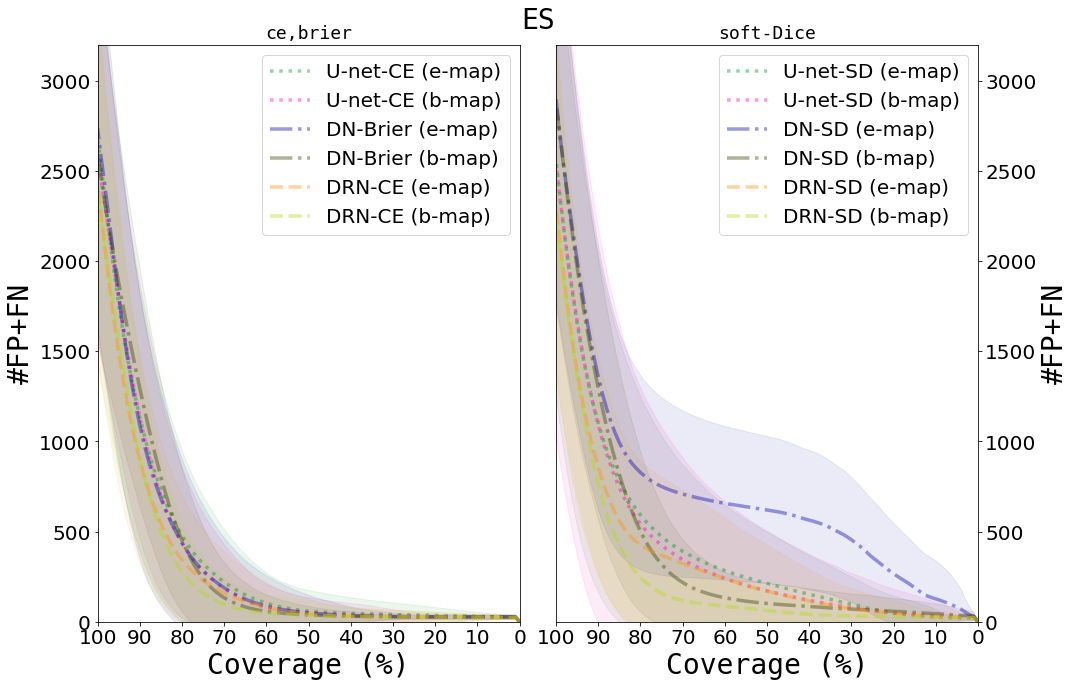

(99, 101)
(99, 101)
(99, 101)
(99, 101)
(99, 101)
(99, 101)
(99, 101)
(99, 101)
(99, 101)
(99, 101)
(99, 101)
(99, 101)
unet_mc_dcnn_mc_drn_mc
INFO - Successfully saved fig /home/jorg/expers/acdc/figures/cov_risk_curve_ED_seg_errors.jpeg


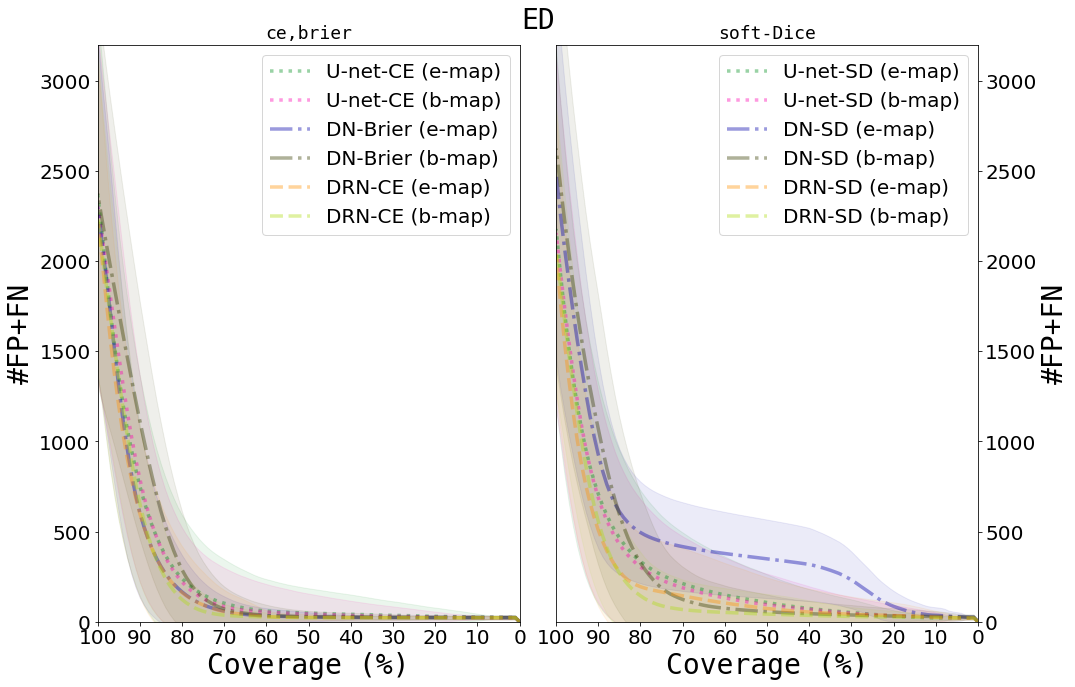

In [76]:
from plotting.coverage_risk_curves import plot_coverage_risk_curve, plot_coverage_risk_curve_per_loss

file_list_es = ["/home/jorg/expers/acdc/unet_mc_dice/cov_risk_" + "emap_ES_cropped.npz",
             "/home/jorg/expers/acdc/unet_mc_dice/cov_risk_" + "bmap_ES_cropped.npz",
             "/home/jorg/expers/acdc/dcnn_mc_dice/cov_risk_" + "emap_ES_cropped.npz",
             "/home/jorg/expers/acdc/dcnn_mc_dice/cov_risk_" + "bmap_ES_cropped.npz",
             "/home/jorg/expers/acdc/drn_mc_dice/cov_risk_" + "emap_ES_cropped.npz",
             "/home/jorg/expers/acdc/drn_mc_dice/cov_risk_" + "bmap_ES_cropped.npz",
             "/home/jorg/expers/acdc/unet_mc_ce/cov_risk_" + "emap_ES_cropped.npz",
             "/home/jorg/expers/acdc/unet_mc_ce/cov_risk_" + "bmap_ES_cropped.npz",
             "/home/jorg/expers/acdc/dcnn_mc_brier/cov_risk_" + "emap_ES_cropped.npz",
             "/home/jorg/expers/acdc/dcnn_mc_brier/cov_risk_" + "bmap_ES_cropped.npz",
             "/home/jorg/expers/acdc/drn_mc_ce/cov_risk_" + "emap_ES_cropped.npz",
             "/home/jorg/expers/acdc/drn_mc_ce/cov_risk_" + "bmap_ES_cropped.npz"
            ]
# file_list = ["/home/jorg/expers/acdc/unet_mc_dice/cov_risk_" + "emap_ES_cropped.npz"]
do_save = True
error_metric =  'seg_errors' # 'hd' #
# error_metric = 'hd'
output_dir = "/home/jorg/expers/acdc/figures/"
eval_id = None

# eval_objects = [create_eval_obj(fname) for fname in file_list]

for cardiac_phase in ['ES', 'ED']:
    if cardiac_phase == "ES":
        file_list = file_list_es
    else:
        file_list = [fname.replace("ES", "ED") for fname in file_list_es]
    plot_coverage_risk_curve_per_loss([create_eval_obj(fname) for fname in file_list], width=16, 
                                 height=10, do_save=do_save, do_show=True, 
                                  error_metric=error_metric, 
                                 output_dir=output_dir, eval_id=eval_id)

### Create list of result objects (dictionary) based on file list

In [3]:
# list of files that contain the results of the SelectiveClassification
# for each model we have 2 files: 1: emap 2: bmap
result_dir = "/home/jorg/expers/acdc/f0/"
umap = 'emap'
networks = ['']

                
file_list_es = [
                "/home/jorg/expers/acdc/drn_mc_dice/cov_risk_" + umap + "_ES_cropped.npz",
                "/home/jorg/expers/acdc/drn_mc_dice/cov_risk_" + "bmap" + "_ES_cropped.npz",
                "/home/jorg/expers/acdc/drn_mc_ce/cov_risk_" + umap + "_ES_cropped.npz",
                "/home/jorg/expers/acdc/drn_mc_ce/cov_risk_" + "bmap" + "_ES_cropped.npz",
                "/home/jorg/expers/acdc/dcnn_mc_brier/cov_risk_" + umap + "_ES_cropped.npz",
                "/home/jorg/expers/acdc/dcnn_mc_brier/cov_risk_" + "bmap" + "_ES_cropped.npz",
                "/home/jorg/expers/acdc/dcnn_mc_dice/cov_risk_" + umap + "_ES_cropped.npz",
                "/home/jorg/expers/acdc/dcnn_mc_dice/cov_risk_" + "bmap" + "_ES_cropped.npz",
                "/home/jorg/expers/acdc/unet_mc_dice/cov_risk_" + umap + "_ES_cropped.npz",
                "/home/jorg/expers/acdc/unet_mc_dice/cov_risk_" + "bmap" + "_ES_cropped.npz",
                "/home/jorg/expers/acdc/unet_mc_ce/cov_risk_" + umap + "_ES_cropped.npz",
                "/home/jorg/expers/acdc/unet_mc_ce/cov_risk_" + "bmap" + "_ES_cropped.npz"
]


file_list_ed = [fname.replace("ES", "ED") for fname in file_list_es]
eval_obj_list_es = [create_eval_obj(fname) for fname in file_list_es]
eval_obj_list_ed= [create_eval_obj(fname) for fname in file_list_ed]

drn_mc_dcnn_mc_unet_mc
INFO - Successfully saved fig /home/jorg/expers/acdc/figures/cov_risk_curve_ED_seg_errors.jpeg


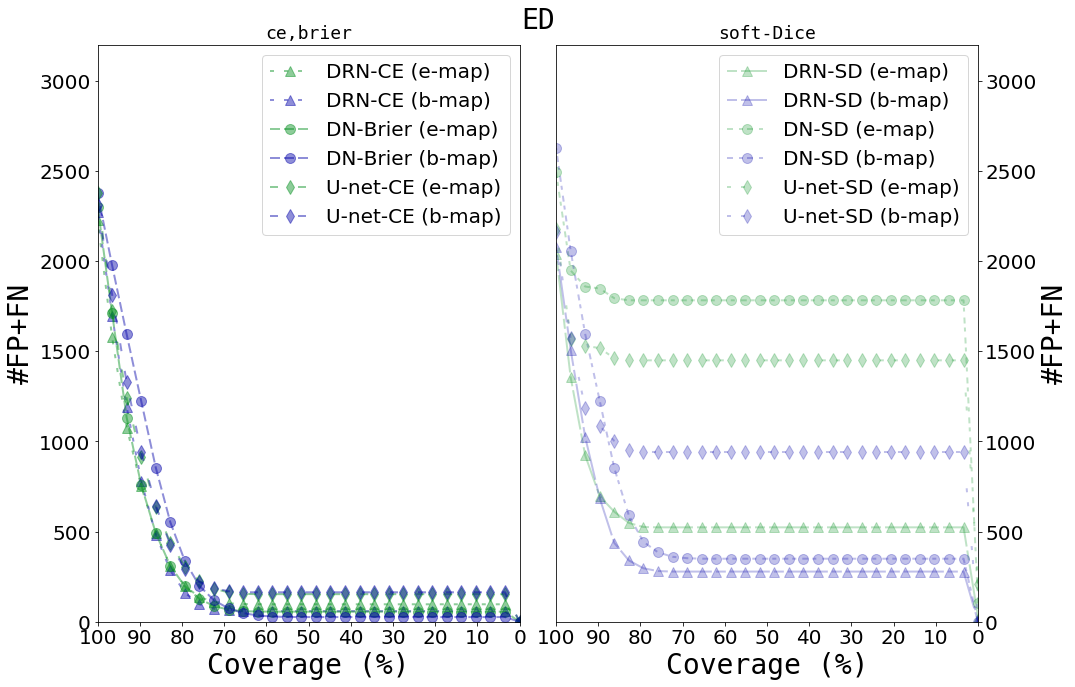

drn_mc_dcnn_mc_unet_mc
INFO - Successfully saved fig /home/jorg/expers/acdc/figures/cov_risk_curve_ES_seg_errors.jpeg


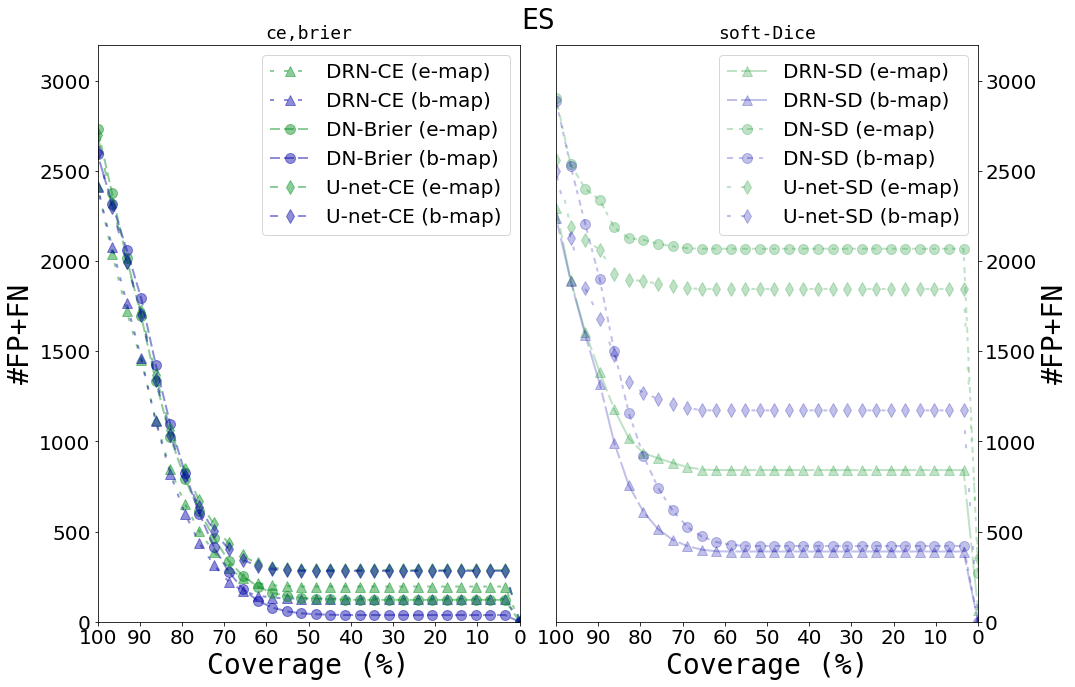

drn_mc_dcnn_mc_unet_mc
INFO - Successfully saved fig /home/jorg/expers/acdc/figures/cov_risk_curve_ED_hd.jpeg


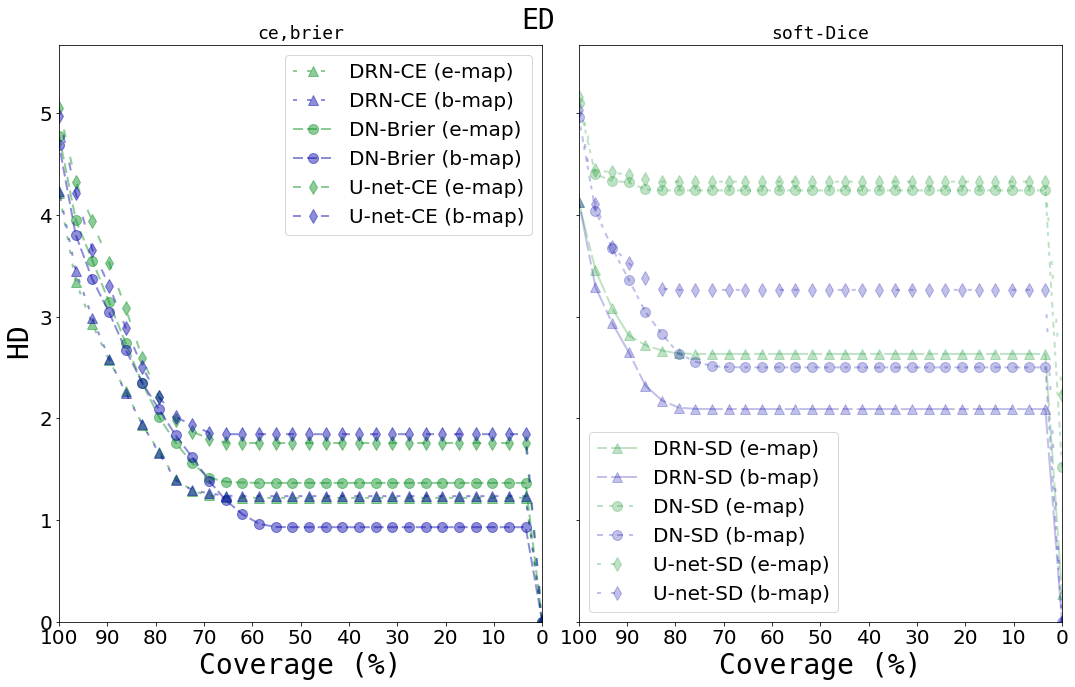

drn_mc_dcnn_mc_unet_mc
INFO - Successfully saved fig /home/jorg/expers/acdc/figures/cov_risk_curve_ES_hd.jpeg


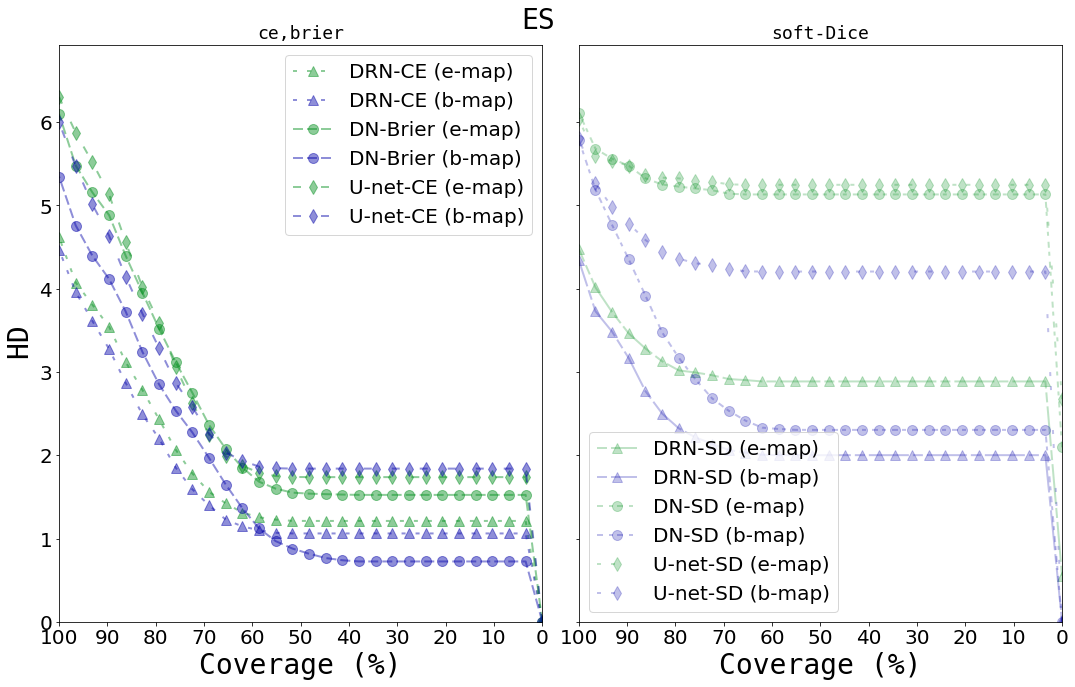

drn_mc_dcnn_mc_unet_mc
INFO - Successfully saved fig /home/jorg/expers/acdc/figures/cov_risk_curve_ED_dice.jpeg


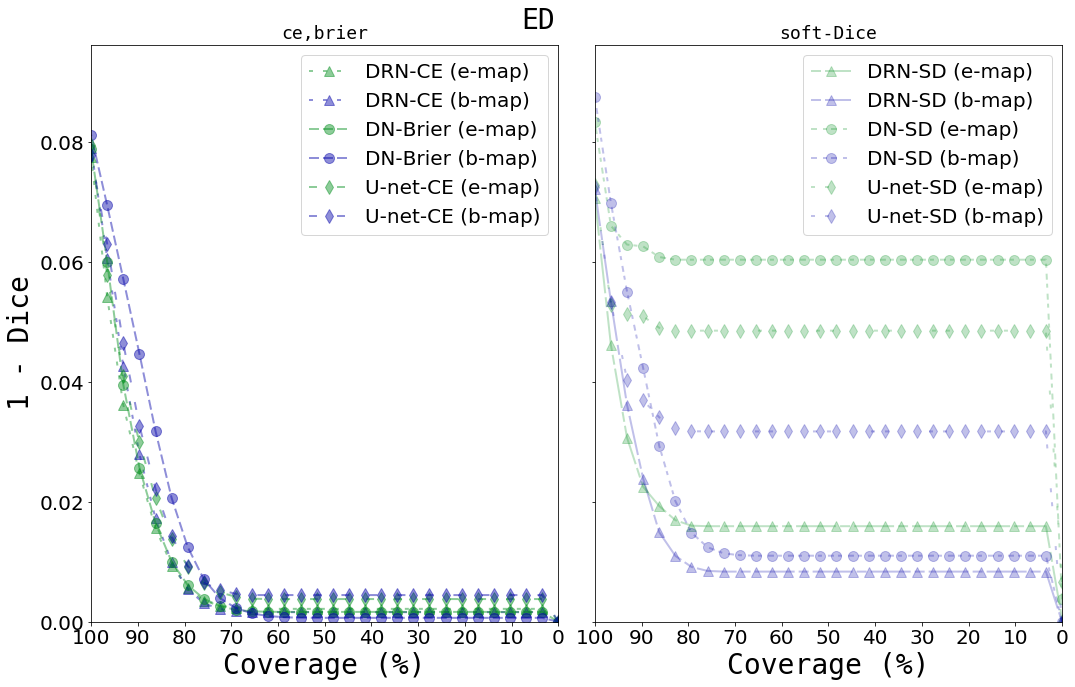

drn_mc_dcnn_mc_unet_mc
INFO - Successfully saved fig /home/jorg/expers/acdc/figures/cov_risk_curve_ES_dice.jpeg


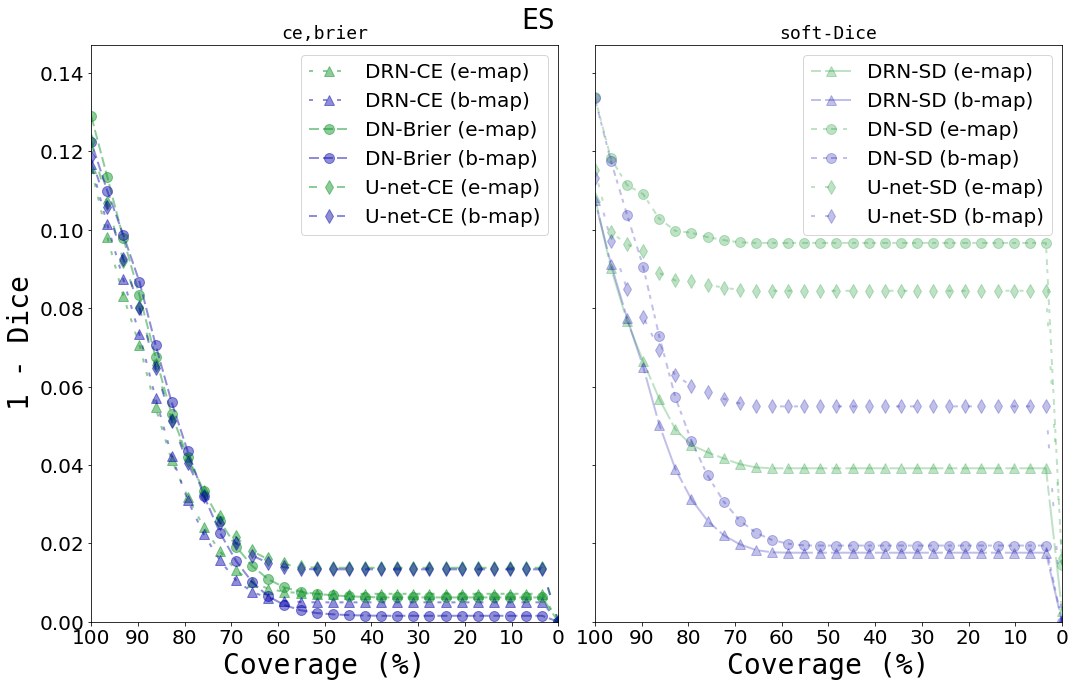

In [7]:
from plotting.coverage_risk_curves import plot_coverage_risk_curve, plot_coverage_risk_curve_per_loss

output_dir = "/home/jorg/expers/acdc/figures/"
cardiac_phases = ['ED', 'ES']
error_metrics = ['seg_errors', 'hd', 'dice']
do_save = True
eval_id = None

for error_metric in error_metrics:
    for cardiac_phase in cardiac_phases:
        if cardiac_phase == "ES":
            file_list = file_list_es
        else:
            file_list = file_list_ed
        plot_coverage_risk_curve_per_loss([create_eval_obj(fname) for fname in file_list], width=16, 
                                 height=10, do_save=do_save, do_show=True, error_metric=error_metric, 
                                 output_dir=output_dir, eval_id=eval_id)

In [79]:
from datasets.ACDC.get_data import get_pred_labels, get_umaps, get_detector_target_labels

src_data_path1 = os.path.expanduser("~/expers/acdc/f0/dcnn_mc_brier/")
src_data_path2 = os.path.expanduser("~/expers/acdc/f0/unet_mc_ce/")
src_data_path3 = os.path.expanduser("~/expers/acdc/f0/drn_mc_ce/")
cardiac_phase = "ED"
mc_dropout = True
dt_config_id = "fixed_42_28"

data_dict1, data_dict2, data_dict3 = {}, {}, {}
data_dict1['umaps'] = get_umaps(src_data_path1, cardiac_phase, mc_dropout=mc_dropout)
data_dict1['dt_labels'] = get_detector_target_labels(src_data_path1, cardiac_phase, dt_config_id)

data_dict2['umaps'] = get_umaps(src_data_path2, cardiac_phase, mc_dropout=mc_dropout)
data_dict2['dt_labels'] = get_detector_target_labels(src_data_path2, cardiac_phase, dt_config_id)

data_dict3['umaps'] = get_umaps(src_data_path3, cardiac_phase, mc_dropout=mc_dropout)
data_dict3['dt_labels'] = get_detector_target_labels(src_data_path3, cardiac_phase, dt_config_id)
print("Ready")

Ready


In [80]:
from scipy.stats import mannwhitneyu
import copy

total_err1, total_err2, total_err3 = [], [], []
total_u1, total_u2, total_u3 = [], [], []
thres = 0.6

for patid, dt_lbl1 in data_dict1['dt_labels'].items():
    dt_lbl2 = data_dict2['dt_labels'][patid]
    dt_lbl3 = data_dict3['dt_labels'][patid]
    umap1 = copy.deepcopy(data_dict1['umaps'][patid]['umap'])
    umap2 = copy.deepcopy(data_dict2['umaps'][patid]['umap'])
    umap3 = copy.deepcopy(data_dict3['umaps'][patid]['umap'])
    dt_indices1 = np.sum(dt_lbl1, axis=1) > 0
    dt_indices2 = np.sum(dt_lbl2, axis=1) > 0
    dt_indices3 = np.sum(dt_lbl3, axis=1) > 0
    umap1[~dt_indices1], umap2[~dt_indices2], umap3[~dt_indices3] = 0, 0, 0
    err1, err2 = np.sum(dt_indices1, axis=(1, 2)).flatten(), np.sum(dt_indices2, axis=(1, 2)).flatten()
    err3 = np.sum(dt_indices3, axis=(1, 2)).flatten()
    u1 = np.sum(umap1, axis=(1, 2)) # / np.sum(dt_indices1, axis=(1, 2)).flatten()
    u2 = np.sum(umap2, axis=(1, 2)) # / np.sum(dt_indices2, axis=(1, 2)).flatten()
    u3 = np.sum(umap3, axis=(1, 2)) # / np.sum(dt_indices3, axis=(1, 2)).flatten()
    u1, u2, u3 = np.nan_to_num(u1), np.nan_to_num(u2), np.nan_to_num(u3)
    total_u1.extend(u1)
    total_u2.extend(u2)
    total_u3.extend(u3)
    total_err1.extend(err1)
    total_err2.extend(err2)
    total_err3.extend(err3)
    # print(u1)
    # print(err1)
    # print("pat {} u1={:.4f}/{} u2={:.4f}/{} u3={:.4f}/{}".format(patid, u1, np.sum(dt_indices1), 
    #                                                             u2, np.sum(dt_indices2),
    #                                                             u3, np.sum(dt_indices3)))
    
print(len(total_u1), len(total_err1))

228 228


(1) Corr err-size/uncertainty s=2.292	 r=0.870
(2) Corr err-size/uncertainty s=2.396	 r=0.886
(3) Corr err-size/uncertainty s=2.875	 r=0.799
Saved figure to /home/jorg/expers/acdc/f0/figures/correlation_SizeSegErrors_SumUncertainties_ED_bmap.jpeg


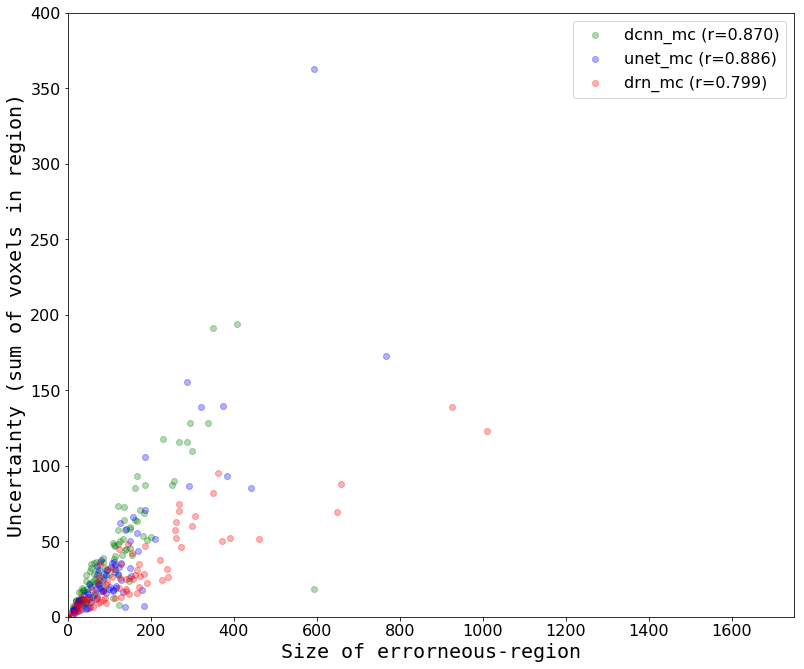

In [81]:
from scipy.stats import linregress
axis_label_size = {'fontname': 'Monospace', 'size': '20', 'color': 'black', 'weight': 'normal'}

do_save = True

slope_1, intercept_1, r_value_1, p_value_1, _ = linregress(total_u1,total_err1)
slope_2, intercept_2, r_value_2, p_value_2, _ = linregress(total_u2,total_err2)
slope_3, intercept_3, r_value_3, p_value_3, _ = linregress(total_u3,total_err3)

print("(1) Corr err-size/uncertainty s={:.3f}\t r={:.3f}".format(slope_1, r_value_1))
print("(2) Corr err-size/uncertainty s={:.3f}\t r={:.3f}".format(slope_2, r_value_2))
print("(3) Corr err-size/uncertainty s={:.3f}\t r={:.3f}".format(slope_3, r_value_3))

fig = plt.figure(figsize=(12, 10))
ax = plt.gca()
plt.scatter(total_err1, total_u1, c='g', label="dcnn_mc (r={:.3f})".format(r_value_1), alpha=0.3)
plt.scatter(total_err2, total_u2, c='b', label="unet_mc (r={:.3f})".format(r_value_2), alpha=0.3)
plt.scatter(total_err3, total_u3, c='r', label="drn_mc (r={:.3f})".format(r_value_3), alpha=0.3)
plt.legend(loc="best")

plt.ylim([0., 400])
plt.xlim([0, 1750])
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel("Size of errorneous-region", **axis_label_size)
plt.ylabel("Uncertainty (sum of voxels in region)", **axis_label_size)
plt.legend(loc="best", prop={'size': 16})

fig.tight_layout(rect=[0.03, 0.03, 0.97, 0.97])
if do_save:
    type_of_map = "bmap" if mc_dropout else "emap"
    fig_file_name = os.path.join(output_dir, "correlation_SizeSegErrors_SumUncertainties_" + \
                                 cardiac_phase + "_" + type_of_map + ".jpeg")
    plt.savefig(fig_file_name, bbox_inches='tight')
    print("Saved figure to {}".format(fig_file_name))
plt.show()


(1) Corr err-size/uncertainty s=1.990	 r=0.966
(2) Corr err-size/uncertainty s=2.137	 r=0.852
(3) Corr err-size/uncertainty s=2.467	 r=0.864


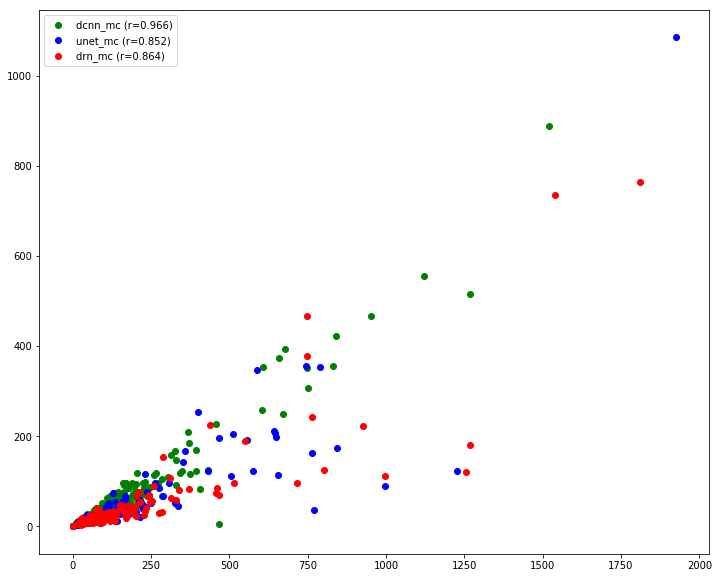

In [47]:
from scipy.stats import linregress

slope_1, intercept_1, r_value_1, p_value_1, _ = linregress(total_u1,total_err1)
slope_2, intercept_2, r_value_2, p_value_2, _ = linregress(total_u2,total_err2)
slope_3, intercept_3, r_value_3, p_value_3, _ = linregress(total_u3,total_err3)

print("(1) Corr err-size/uncertainty s={:.3f}\t r={:.3f}".format(slope_1, r_value_1))
print("(2) Corr err-size/uncertainty s={:.3f}\t r={:.3f}".format(slope_2, r_value_2))
print("(3) Corr err-size/uncertainty s={:.3f}\t r={:.3f}".format(slope_3, r_value_3))

plt.rcParams['figure.figsize'] = [12.0, 10.0]
ax = plt.gca()
plt.scatter(total_err1, total_u1, c='g', label="dcnn_mc (r={:.3f})".format(r_value_1))
plt.scatter(total_err2, total_u2, c='b', label="unet_mc (r={:.3f})".format(r_value_2))
plt.scatter(total_err3, total_u3, c='r', label="drn_mc (r={:.3f})".format(r_value_3))
plt.legend(loc="best")
# plt.ylim([0., 0.7])
# plt.ylim([0., 250])
#plt.xlim([0, 500])
plt.show()